# I have reversed a standard CNN to make it work like a GAN.
Here I have used a slightly different approach than GANs. GANs generally use a Generator to generate the image and a discriminator image to compare it with the generator and the problem acts like a binary classification where the ans is either YES or NO. I have used MSE/MAE loss to generate images similar to that in the training data as in Mnist we have only 10 labels and so different image outputs for a same label are not required.   

In [192]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Regarding fetching the data
Here I am taking the images in y_train and y_test and the corresponding labels in x_train and x_test.

In [187]:
(y_train, x_train), (y_test, x_test) =  tf.keras.datasets.mnist.load_data()

In [188]:
y_train.shape

(60000, 28, 28)

In [189]:
x_train.shape

(60000,)

In [195]:
x_train = tf.one_hot(x_train, 10)

In [196]:
x_test = tf.one_hot(x_test, 10)

In [197]:
x_train = np.array(x_train)
x_test = np.array(x_test)

## Now we will make a method to create our image generator network

In [198]:
def create_model():
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Dense(7*7*512, activation="relu", input_shape=(10,)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Reshape((7,7,512)))


    model.add(tf.keras.layers.Conv2DTranspose(128, (4,4), activation="relu"))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Conv2DTranspose(64, (6,6), strides=(2,2), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Conv2DTranspose(32, (5,5), strides=(1,1), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Conv2DTranspose(1, (1,1), strides=(1,1), activation="relu"))
    #assert model.output_shape == (None, 28, 28)
    return model

In [199]:
my_model = create_model()
my_model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 25088)             275968    
_________________________________________________________________
batch_normalization_118 (Bat (None, 25088)             100352    
_________________________________________________________________
reshape_32 (Reshape)         (None, 7, 7, 512)         0         
_________________________________________________________________
conv2d_transpose_117 (Conv2D (None, 10, 10, 128)       1048704   
_________________________________________________________________
batch_normalization_119 (Bat (None, 10, 10, 128)       512       
_________________________________________________________________
conv2d_transpose_118 (Conv2D (None, 24, 24, 64)        294976    
_________________________________________________________________
batch_normalization_120 (Bat (None, 24, 24, 64)      

In [203]:
my_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss="MAE", metrics=["accuracy"])

### This below code cell is trained with lr = 0.0001

In [201]:
history = my_model.fit(x_train, y_train, epochs=5, validation_split=0.1, batch_size=64, verbose=1)

Epoch 1/5
844/844 [==============================] - 781s 925ms/step - loss: 31.9969 - accuracy: 0.7501 - val_loss: 31.3459 - val_accuracy: 0.7680
Epoch 2/5
844/844 [==============================] - 781s 925ms/step - loss: 31.1189 - accuracy: 0.7665 - val_loss: 30.3790 - val_accuracy: 0.7658
Epoch 3/5
844/844 [==============================] - 778s 921ms/step - loss: 30.3083 - accuracy: 0.7645 - val_loss: 29.4818 - val_accuracy: 0.7640
Epoch 4/5
844/844 [==============================] - 745s 883ms/step - loss: 29.4798 - accuracy: 0.7601 - val_loss: 28.6037 - val_accuracy: 0.7586
Epoch 5/5
844/844 [==============================] - 532s 631ms/step - loss: 28.6666 - accuracy: 0.7545 - val_loss: 27.7628 - val_accuracy: 0.7574


### And then model was trained again with lr = 0.001

In [204]:
history = my_model.fit(x_train, y_train, epochs=3, validation_split=0.1, batch_size=64, verbose=1)

Epoch 1/3
844/844 [==============================] - 549s 651ms/step - loss: 26.6979 - accuracy: 0.7477 - val_loss: 25.5242 - val_accuracy: 0.7525
Epoch 2/3
844/844 [==============================] - 529s 627ms/step - loss: 26.1396 - accuracy: 0.7596 - val_loss: 25.5026 - val_accuracy: 0.7621
Epoch 3/3
844/844 [==============================] - 532s 630ms/step - loss: 26.1190 - accuracy: 0.7603 - val_loss: 25.4343 - val_accuracy: 0.7606


### The trained model weights were then stored so that they can be used or retrained again the next time without starting from scratch

In [205]:
my_model.save("reverse_mnist.h5")

In [206]:
loss, acc = my_model.evaluate(x_test, y_test)

313/313 [==============================] - 42s 133ms/step - loss: 25.9146 - accuracy: 0.7594


In [221]:
acc = history.history["accuracy"]
loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]
epochs = range(len(acc))

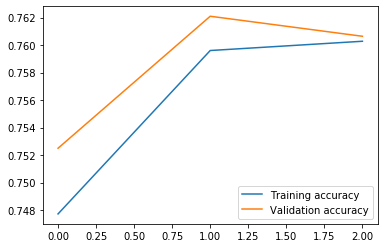

In [225]:
plt.plot(epochs, acc, label="Training accuracy")
plt.plot(epochs, val_acc, label="Validation accuracy")
plt.legend()

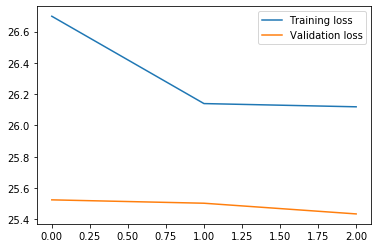

In [226]:
plt.plot(epochs, loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.legend()

In [227]:
pred = my_model.predict(x_test)

In [228]:
pred.shape

(10000, 28, 28, 1)

<Figure size 1440x720 with 0 Axes>

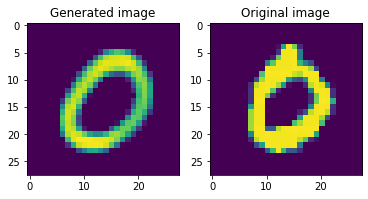

In [251]:
i = 3
plt.figure(figsize=(20,10))
fig, (ax1,ax2) = plt.subplots(1,2)
img = pred[i].reshape((28,28))
ax1.set_title("Generated image")
ax1.imshow(img)
ax2.set_title("Original image")
ax2.imshow(y_test[i])

<Figure size 1440x720 with 0 Axes>

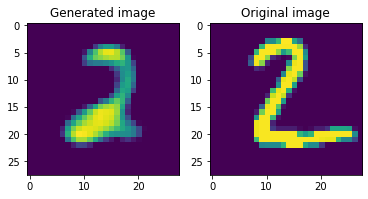

In [252]:
i = 1
plt.figure(figsize=(20,10))
fig, (ax1,ax2) = plt.subplots(1,2)
img = pred[i].reshape((28,28))
ax1.set_title("Generated image")
ax1.imshow(img)
ax2.set_title("Original image")
ax2.imshow(y_test[i])

<Figure size 1440x720 with 0 Axes>

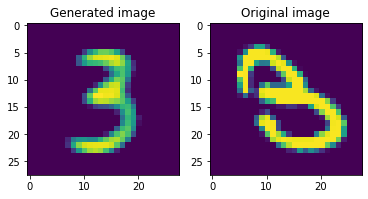

In [253]:
i = 18
plt.figure(figsize=(20,10))
fig, (ax1,ax2) = plt.subplots(1,2)
img = pred[i].reshape((28,28))
ax1.set_title("Generated image")
ax1.imshow(img)
ax2.set_title("Original image")
ax2.imshow(y_test[i])

<Figure size 1440x720 with 0 Axes>

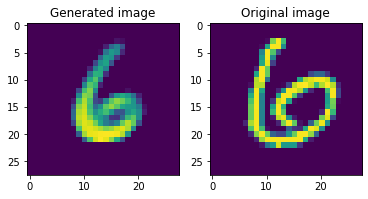

In [254]:
i = 11
plt.figure(figsize=(20,10))
fig, (ax1,ax2) = plt.subplots(1,2)
img = pred[i].reshape((28,28))
ax1.set_title("Generated image")
ax1.imshow(img)
ax2.set_title("Original image")
ax2.imshow(y_test[i])